# Oracle and Python with cx_Oracle
- An example of how to query Oracle from Python using cx_Oracle
- It show a way to integrate data from Oracle databases into Python's data analysis tools with [pandas](http://pandas.pydata.org/)
- Dependencies: needs an [Oracle client installation](http://www.oracle.com/technetwork/topics/linuxx86-64soft-092277.html) and [cx_Oracle](https://pypi.python.org/pypi/cx_Oracle)

## Query Oracle from Python with cx_Oracle

In [1]:
# connect to Oracle using cx_Oracle, open a cursor, run a query and fetch the results

import cx_Oracle
ora_conn = cx_Oracle.connect('scott/tiger@dbserver:1521/orcl.mydomain.com')

cursor = ora_conn.cursor()
cursor.execute('select ename, sal from emp')
res = cursor.fetchall()
cursor.close()

print res

[('FORD', 3000), ('TURNER', 1500), ('BLAKE', 2850), ('MARTIN', 1250), ('SCOTT', 3000), ('JONES', 2975), ('SMITH', 800), ('KING', 5000), ('WARD', 1250), ('MILLER', 1300), ('ALLEN', 1600), ('JAMES', 950), ('CLARK', 2450), ('ADAMS', 1100)]


## cx_Oracle integration with Pandas

In [2]:
import pandas as pd

# query Oracle using ora_conn and put the result into a pandas Dataframe
df_ora = pd.read_sql('select * from emp', con=ora_conn)    
df_ora

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
0,7902,FORD,ANALYST,7566.0,1981-12-03,3000,NaN,20
1,7844,TURNER,SALESMAN,7698.0,1981-09-08,1500,0.0,30
2,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
3,7654,MARTIN,SALESMAN,7698.0,1981-09-28,1250,1400.0,30
4,7788,SCOTT,ANALYST,7566.0,1987-04-19,3000,NaN,20
5,7566,JONES,MANAGER,7839.0,1981-04-02,2975,NaN,20
6,7369,SMITH,CLERK,7902.0,1980-12-17,800,NaN,20
7,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
8,7521,WARD,SALESMAN,7698.0,1981-02-22,1250,500.0,30
9,7934,MILLER,CLERK,7782.0,1982-01-23,1300,NaN,10


## Use of bind variables

In [3]:
df_ora = pd.read_sql('select * from emp where empno=:myempno', params={"myempno":7839}, 
                     con=ora_conn) 
df_ora

,EMPNO,ENAME,JOB,MGR,HIREDATE,SAL,COMM,DEPTNO
0,7839,KING,PRESIDENT,None,1981-11-17,5000,None,10


## Basic visualization

In [4]:
# initialize the graphics environment for matplotlib
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')

In [5]:
df_ora = pd.read_sql('select ename "Name", sal "Salary" from emp', con=ora_conn)    

ora_conn.close()

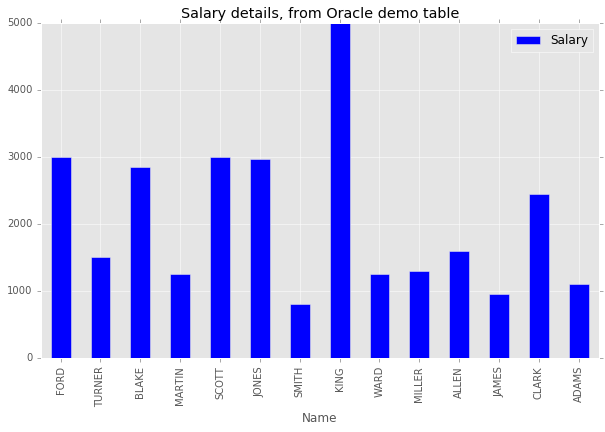

In [6]:
df_ora.plot(x='Name', y='Salary', title='Salary details, from Oracle demo table', 
            figsize=(10, 6), kind='bar', color='blue')

## Visualization of Oracle AWR data
- An example of visualization of a multidimensional data set: Oracle AWR repository
- See also <https://github.com/LucaCanali/PerfSheet.js> for more details on querying and plotting AWR data

In [7]:
ora_conn = cx_Oracle.connect('system/manager@dbserver:1521/orcl.mydomain.com')

df_ora = pd.read_sql('''
select cast(min(sn.begin_interval_time) over (partition by sn.dbid,sn.snap_id) as date) snap_time,
       sn.instance_number,
       ss.metric_name||' - '||ss.metric_unit metric_name_unit,
       ss.maxval,
       ss.average
from dba_hist_sysmetric_summary ss,
     dba_hist_snapshot sn
where
     sn.snap_id = ss.snap_id
     and sn.dbid = ss.dbid
     and sn.instance_number = ss.instance_number
     and sn.begin_interval_time between trunc(sysdate-2) and trunc(sysdate)
order by sn.snap_id''', con=ora_conn)   

ora_conn.close()

In [8]:
mydata=df_ora[(df_ora['METRIC_NAME_UNIT']=='Average Active Sessions - Active Sessions') & 
              (df_ora['INSTANCE_NUMBER']==1)][['SNAP_TIME','AVERAGE']]
mydata.columns=['Snapshot time','Average N# active sessions']
mydata

,Snapshot time,Average N# active sessions
259,2016-06-04 00:00:10,3.920560
902,2016-06-04 00:30:17,3.707861
1519,2016-06-04 01:00:04,2.855422
2185,2016-06-04 01:30:05,2.227370
2831,2016-06-04 02:00:12,2.152043
3535,2016-06-04 02:30:15,2.131511
4133,2016-06-04 03:00:22,2.018975
4706,2016-06-04 03:30:29,2.009894
5317,2016-06-04 04:00:01,2.822917
5993,2016-06-04 04:30:07,4.023914


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as md
plt.style.use('ggplot')

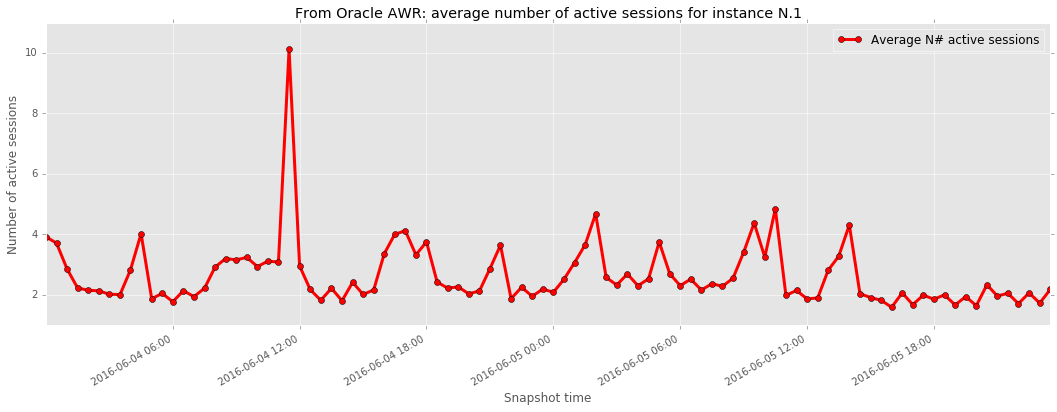

In [10]:
ax = mydata.plot(x='Snapshot time', y='Average N# active sessions', 
                 linewidth=3, style='ro-', figsize=(18, 6), 
                 title='From Oracle AWR: average number of active sessions for instance N.1')

xfmt = md.DateFormatter('%Y-%m-%d %H:%M')
ax.xaxis.set_major_formatter(xfmt)
ax.set_ylabel('Number of active sessions')

## Use of pivot and pandas

In [11]:
my_pivot=df_ora.pivot_table(index="SNAP_TIME", columns="METRIC_NAME_UNIT", aggfunc=sum, values="AVERAGE")

my_pivot

METRIC_NAME_UNIT,Active Parallel Sessions - Sessions,Active Serial Sessions - Sessions,Average Active Sessions - Active Sessions,Average Synchronous Single-Block Read Latency - Milliseconds,Background CPU Usage Per Sec - CentiSeconds Per Second,Background Checkpoints Per Sec - Check Points Per Second,Background Time Per Sec - Active Sessions,Branch Node Splits Per Sec - Splits Per Second,Branch Node Splits Per Txn - Splits Per Txn,Buffer Cache Hit Ratio - % (LogRead - PhyRead)/LogRead,...,User Calls Ratio - % UserCalls/AllCalls,User Commits Per Sec - Commits Per Second,User Commits Percentage - % (UserCommit/TotalUserTxn),User Limit % - % Sessions/License_Limit,User Rollback Undo Records Applied Per Txn - Records Per Txn,User Rollback UndoRec Applied Per Sec - Records Per Second,User Rollbacks Per Sec - Rollbacks Per Second,User Rollbacks Percentage - % (UserRollback/TotalUserTxn),User Transaction Per Sec - Transactions Per Second,Workload Capture and Replay status - status
SNAP_TIME,,,,,,,,,,,,,,,,,,,,,
2016-06-04 00:00:10,0.200000,30.133333,22.029518,111.506866,242.588983,0.003889,3.723117,0.224473,0.001329,397.349434,...,279.103876,905.370422,395.138030,0.000033,7.665098,3625.375920,5.665756,4.861970,911.036177,0.0
2016-06-04 00:30:17,0.033333,23.466667,17.255362,117.181601,157.808957,0.003323,1.908710,0.299461,0.003180,389.629693,...,285.838168,1014.622589,396.392062,0.000036,0.090494,22.413794,5.455471,3.607938,1020.078060,0.0
2016-06-04 01:00:04,0.100000,22.833333,15.592799,186.665864,149.204332,0.002790,1.872055,0.237342,0.001077,399.790348,...,283.738210,961.149508,394.891787,0.000035,0.136168,42.993456,6.039411,5.108213,967.188918,0.0
2016-06-04 01:30:05,0.200000,29.300000,18.818992,129.780716,154.993868,0.003335,1.815822,0.308189,0.000966,399.843517,...,282.684440,1121.274806,392.039774,0.000036,0.057145,21.307433,8.031768,7.960226,1129.306573,0.0
2016-06-04 02:00:12,0.133333,27.733333,20.950676,381.086351,186.136682,0.003898,2.401716,0.219868,0.000906,399.781621,...,278.407817,1113.572113,392.981897,0.000037,0.105903,51.171744,6.441019,7.018103,1120.013132,0.0
2016-06-04 02:30:15,0.466667,25.100000,15.606730,124.422607,156.784178,0.003323,1.894843,0.236719,0.000669,399.919298,...,280.215017,1173.521231,394.954972,0.000037,0.055846,26.324725,5.472090,5.045028,1178.993321,0.0
2016-06-04 03:00:22,0.433333,27.125806,20.837934,220.009492,164.058485,0.003308,2.038079,0.246270,0.000861,399.922377,...,285.289217,1103.210949,395.511516,0.000037,0.067660,26.956894,6.073276,4.488484,1109.284225,0.0
2016-06-04 03:30:29,0.200000,23.650575,18.126186,193.933580,140.621508,0.003392,1.683948,0.186295,0.000675,399.929673,...,287.178937,1063.146494,396.464817,0.000037,0.063940,26.376526,5.372848,3.535183,1068.519341,0.0
2016-06-04 04:00:01,0.066667,24.288172,17.437579,144.973160,227.435097,0.002754,3.364817,0.299046,0.001095,395.275500,...,284.744470,1084.686930,396.211321,0.000037,0.137551,60.508421,7.038891,3.788679,1091.725821,0.0


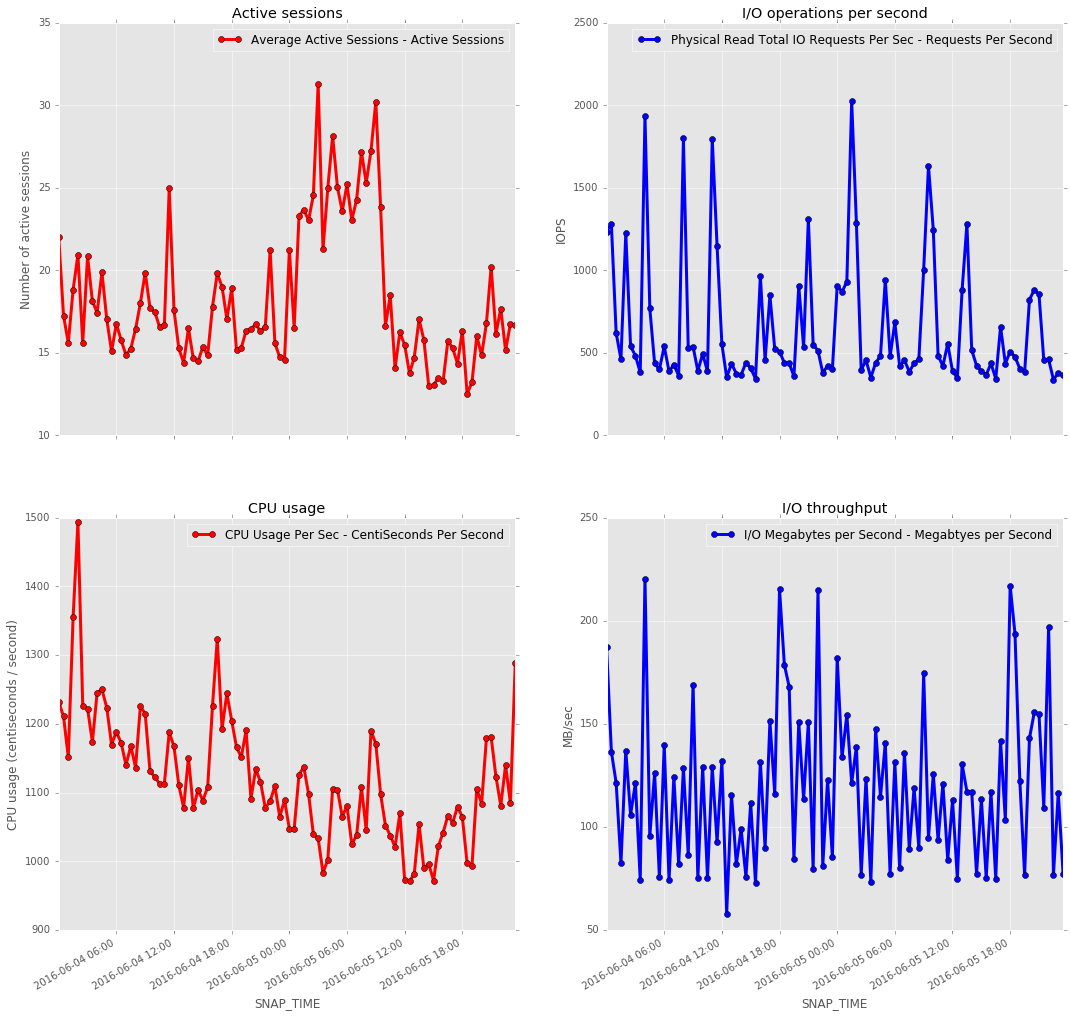

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(18, 18), sharex=True)
axes[0,0].xaxis.set_major_formatter(xfmt)

ax = my_pivot.plot(y='Average Active Sessions - Active Sessions', title='Active sessions', 
     ax=axes[0,0], linewidth=3, style='ro-').set_ylabel('Number of active sessions')
ax = my_pivot.plot(y='CPU Usage Per Sec - CentiSeconds Per Second', title='CPU usage',
     ax=axes[1,0], linewidth=3, style='ro-').set_ylabel('CPU usage (centiseconds / second)')
ax = my_pivot.plot(y='Physical Read Total IO Requests Per Sec - Requests Per Second', 
     title='I/O operations per second',
     ax=axes[0,1], linewidth=3, style='bo-').set_ylabel('IOPS')
ax = my_pivot.plot(y='I/O Megabytes per Second - Megabtyes per Second', title='I/O throughput',
                   ax=axes[1,1], linewidth=3, style='bo-').set_ylabel('MB/sec')
plt.show()